<center><font size="16" ><b>Python Pooling</b></font></center>

<img align="center" src="../imgs/python.png" width="200"/>

<img src='../imgs/cnn_steps_pooling.png' height='800'/>

### 1990 911 - 2180 lbs, 500 HP

<table align="left">
    <tr align="center"><th>original</th><th>green channel</th><th>convolution</th><th>pooling</th></tr>
<tr>
<td><img src="../imgs/porche_2.jpg"/> </td>
<td><img src="../imgs/green_porche.png"/></td>
<td><img src="../imgs/convoluted_porche.png"/></td>
<td><img src="../imgs/pooled_porche.png"/></td>
</tr>
</table>


In [5]:
from AI_Decomposed import *

# gather metadata - height, width, channel count

In [6]:
image_file = '../imgs/porche_2.jpg'
[height, width ,red, green, blue] = image_meta(image_file)

# pooling = data reduction
basically, shrink the image to reduce computational load

# channel dimensions

In [7]:
print('width: ', width, ' height: ', height)

width:  1200  height:  675


# Convolution

In [10]:
import time
start = time. time()
kernel = np.array([[-1,-1,-1], [-1,8,-1], [-1,-1,-1]])
green_padded = np.pad(np.asarray(green).reshape(height,width), 1, 'constant')
start = time.time()
green_convolved = convolve(green_padded, kernel)
print(round(time.time() - start, 2), 'seconds to convolve ', (width* height),' pixel image')
green_convolved_list = list(np.array(green_convolved).flat)

8.18 seconds to convolve  810000  pixel image


# Python Pooling Code

In [11]:
# credit https://stackoverflow.com/users/2005415/jason https://stackoverflow.com/questions/42463172
def pooling(mat,ksize,method='max'):
    '''Non-overlapping pooling on 2D or 3D data. <mat>: ndarray, input array to pool.
    <ksize>: tuple of 2, kernel size in (ky, kx). <method>: str, 'max for max-pooling, 'mean' for mean-pooling.
    Return <result>: pooled matrix.'''
    m, n = mat.shape[:2]
    ky,kx=ksize
    _ceil=lambda x,y: int(np.ceil(x/float(y)))
    ny=m//ky
    nx=n//kx
    mat_pad=mat[:ny*ky, :nx*kx, ...]
    new_shape=(ny,ky,nx,kx)+mat.shape[2:]
    if method=='max':
        result=np.nanmax(mat_pad.reshape(new_shape),axis=(1,3))
    else:
        result=np.nanmean(mat_pad.reshape(new_shape),axis=(1,3))
    return result

# MAX Pooling 

In [12]:
green_array = np.asarray(green_convolved_list).reshape(height,width)

In [13]:
green_pooled = pooling(green_array,ksize=(2,2))

In [14]:
print('width: ', green_pooled.shape[1], ' height: ', green_pooled.shape[0])

width:  600  height:  337


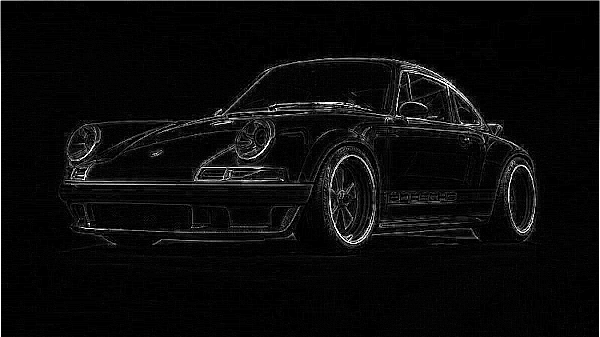

In [16]:
green_pooled_list = list(np.array(green_pooled).flat)
display_channel(green_pooled_list, green_pooled.shape[1])

# MAX Pooling - 3 x 5 window

### Sometimes we have to resize and reshape images.  Usually this is done in the beginning to have all image be of the same dimension.  And eventually, we will have to flatten our image into a 1D list to feed into a neural network.

width:  240  height:  225


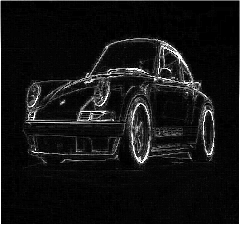

In [17]:
green_array = np.asarray(green_convolved_list).reshape(height,width)

green_pooled = pooling(green_array,ksize=(3,5))

print('width: ', green_pooled.shape[1], ' height: ', green_pooled.shape[0])

green_pooled_list = list(np.array(green_pooled).flat)
display_channel(green_pooled_list, green_pooled.shape[1])

# NEXT -  Python Neural Network

http://localhost:8888/notebooks/Python/4_Python_Neural_Net.ipynb

<img src='../imgs/bokeh_python_NN.png' width='600' />